In [1]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")

print(df.shape)

df.head(5)

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [5]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [7]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [9]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [12]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.103623025, 0.17802684, -0.11873861, -0.034..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-0.0063406364, 0.16712041, -0.06661373, 0.017..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-0.122753024, 0.17192385, -0.024732638, -0.06..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-0.027337318, 0.12501417, -0.0073965387, -0.0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.032708026, 0.093958504, -0.03287002, -0.00..."


In [48]:
from sklearn .model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=1032
)

In [50]:
X_train[:1]

array([array([-3.87667976e-02,  1.00873835e-01, -6.60537705e-02, -5.79414852e-02,
               7.77017251e-02, -1.24388719e-02, -1.53606990e-03, -5.54318093e-02,
              -4.67504822e-02,  2.24241686e+00, -1.62239209e-01, -3.27274986e-02,
               3.91132943e-02, -9.36442390e-02, -1.56693220e-01, -5.02153039e-02,
              -6.66211769e-02,  7.83377767e-01, -1.51802555e-01, -4.44212593e-02,
               2.61561871e-02, -7.75336623e-02,  1.34822279e-02, -2.83611957e-02,
               2.08648853e-02,  1.00303739e-02, -1.32540062e-01, -2.08769888e-02,
              -2.32777037e-02, -1.06235454e-03, -3.55132744e-02,  1.14656746e-01,
              -5.61146885e-02,  5.29519171e-02,  6.99393526e-02, -1.01131901e-01,
              -4.12501469e-02,  1.07328612e-02, -6.74291551e-02, -5.33584645e-03,
              -1.73051283e-02,  4.29863371e-02,  2.44219545e-02, -4.78046760e-02,
               5.28177433e-02,  8.92949663e-03, -8.50099251e-02, -1.55343385e-02,
              -9

In [52]:
#we need to convert it to 
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

X_train_2d

array([[-0.0387668 ,  0.10087384, -0.06605377, ...,  0.02390867,
        -0.00905477,  0.08831383],
       [-0.133756  ,  0.18423922, -0.09768144, ..., -0.10326634,
         0.02888165,  0.03980691],
       [-0.04845724,  0.21334073, -0.06871974, ..., -0.01231161,
        -0.02811426,  0.04735232],
       ...,
       [-0.04406273,  0.16056797, -0.09312736, ..., -0.03122947,
        -0.03327612,  0.05987279],
       [-0.04909129,  0.19871372, -0.11784896, ..., -0.0796856 ,
         0.05645217,  0.06845304],
       [-0.03020455,  0.13580486, -0.07180783, ...,  0.01844755,
        -0.02806757,  0.14588563]], dtype=float32)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       992
           1       0.95      0.94      0.95       988

    accuracy                           0.95      1980
   macro avg       0.95      0.95      0.95      1980
weighted avg       0.95      0.95      0.95      1980



In [58]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       992
           1       0.96      0.98      0.97       988

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[956,  36],
       [ 19, 969]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

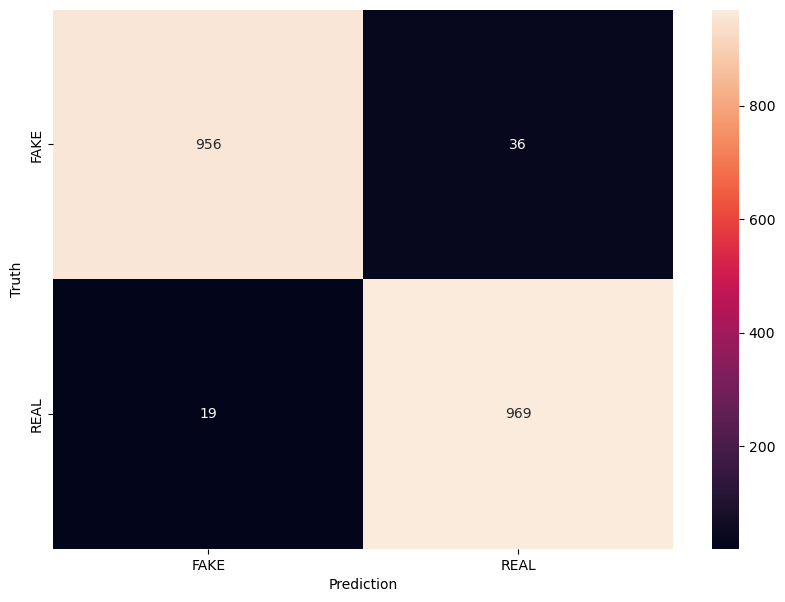

In [62]:
from matplotlib import pyplot as plt
import seaborn as sn

categories = ['EAKE', 'REA']

plt.figure(figsize = (10,7))
sn.heatmap(cm, 
           annot=True, 
           fmt='d',
           xticklabels=categories, 
           yticklabels=categories
          )
plt.xlabel('Prediction')
plt.ylabel('Truth')

KNN model which didn't perform well in the vectorization techniques like Bag of words, and TF-IDF due to very high dimensional vector space, performed really well with glove vectors due to only 300-dimensional vectors and very good embeddings(similar and related words have almost similar embeddings) for the given text data.

MultinomialNB model performed decently well but did not come into the top list because in the 300-dimensional vectors we also have the negative values present. The Naive Bayes model does not fit the data if there are negative values. So, to overcome this shortcoming, we have used the Min-Max scaler to bring down all the values between 0 to 1. In this process, there will be a possibility of variance and information loss among the data. But anyhow we got a decent recall and f1 scores.